In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.datasets import fetch_openml, make_swiss_roll
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
mnist=fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist["data"],mnist["target"]
y=y.astype(np.uint8)

X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

y_train_5=(y_train==5)
y_test_5=(y_test==5)
print(X.shape)
print(y.shape)
print(mnist["DESCR"])

(70000, 784)
(70000,)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were cente

Reached 95% variance with d = 154 dimensions


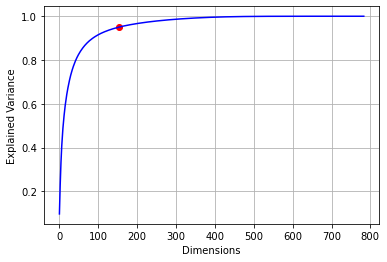

In [9]:
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

plt.plot(range(len(cumsum)),cumsum,c="blue")
plt.scatter(d,cumsum[d-1],c="red",label="0.95 variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()

print("Reached 95% variance with d = {} dimensions".format(d))

In [11]:
n_batches=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced=inc_pca.transform(X_train)

In [4]:
kpca=KernelPCA(n_components=50,kernel="rbf",gamma=0.03).fit(X_train[:10000])
kpca2=KernelPCA(n_components=50,kernel="sigmoid").fit(X_train[:10000])


log_reg=LogisticRegression()
log_reg.fit(kpca.transform(X_train[:10000]),y_train[:10000])
print(log_reg.score(kpca.transform(X_train[:10000]),y_train[:10000]))


log_reg.fit(kpca2.transform(X_train[:10000]),y_train[:10000])
print(log_reg.score(kpca2.transform(X_train[:10000]),y_train[:10000]))


0.1172
0.1127


In [6]:
X_swiss,y_swiss=make_swiss_roll(1500,noise=0.15,random_state=42)
print("min={}   max={}".format(np.min(y_swiss),np.max(y_swiss)))
y_swiss_binned=np.digitize(y_swiss,[0,5,6,7,8,9,10,11,12,13,14,np.inf])

min=4.756044768712248   max=14.134506074563456


In [7]:
from sklearn.metrics import mean_squared_error
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04, fit_inverse_transform=True)
X_reduced=rbf_pca.fit_transform(X_swiss)
X_preimage=rbf_pca.inverse_transform(X_reduced)

mean_squared_error(X_swiss,X_preimage)

32.49896175662132

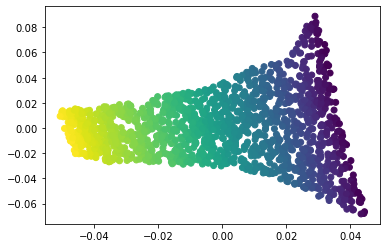

In [10]:
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X_swiss)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_swiss)